In [1]:
import numpy as np # 수치연산 관련 패키지
import pandas as pd # DataFrame을 다루는 데이터 전처리 패키지
from scipy import stats # statistics tools
import statsmodels.api as sm # linear models
import matplotlib.pyplot as plt # 기본 시각화 패키지
import seaborn as sns # 고급(?) 시각화 패키지 - R의 ggplot 같은겁니다.

# Seaborn 시각화 환경 세팅
sns.set_theme(style='white',
              rc = {'axes.unicode_minus': False,
                    'axes.spines.top':False,
                    'axes.spines.right':False,
                    'font.family':'NanumGothic', #폰트이름 (ex. AppleGothic)
                    'font.weight':'normal'})
sns.despine(left=True, bottom=True)
sns.set_palette('tab10')

<Figure size 432x288 with 0 Axes>

In [2]:
hrdf = pd.read_csv('./data/L6_hr.csv')
hrdf.columns = hrdf.columns.str.lower()
hrdf = hrdf.rename({'average_montly_hours':'average_monthly_hours'}, axis=1)
hrdf.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


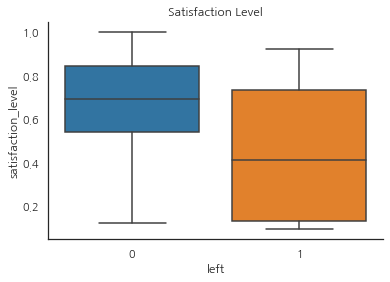

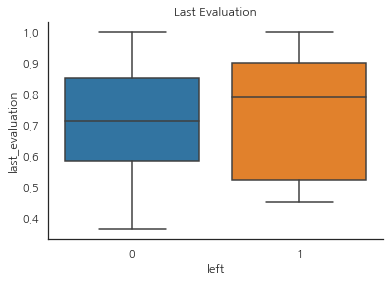

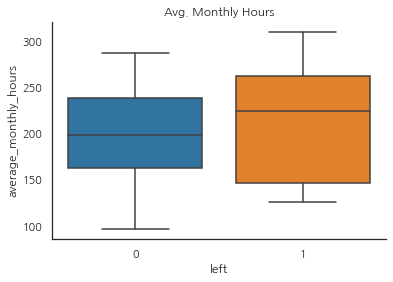

In [3]:
fig = sns.boxplot(y='satisfaction_level', x='left', data=hrdf)
fig.set(title='Satisfaction Level')
plt.show()

fig = sns.boxplot(y='last_evaluation', x='left', data=hrdf)
fig.set(title='Last Evaluation')
plt.show()

fig = sns.boxplot(y='average_monthly_hours', x='left', data=hrdf)
fig.set(title='Avg. Monthly Hours')
plt.show()

In [4]:
hrdf.groupby('number_project').mean()['left'].reset_index()

,number_project,left
0,2,0.656198
1,3,0.017756
2,4,0.093700
3,5,0.221659
4,6,0.557922
5,7,1.000000


In [5]:
hrdf.groupby('time_spend_company').mean()['left'].reset_index()

,time_spend_company,left
0,2,0.016338
1,3,0.246159
2,4,0.348064
3,5,0.565513
4,6,0.291086
5,7,0.000000
6,8,0.000000
7,10,0.000000


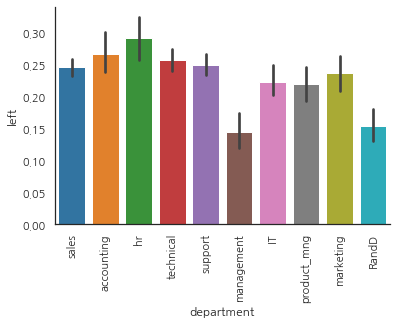

In [6]:
fig = sns.barplot(y='left', x='department', data=hrdf)
plt.xticks(rotation=90)
plt.show()

In [7]:
fullmodel = sm.Logit.from_formula(
    'left~satisfaction_level+average_monthly_hours+promotion_last_5years+salary+C(department)',
    data=hrdf).fit(cov_type='hc3')
fullmodel.summary()

Optimization terminated successfully.
         Current function value: 0.456097
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14984
Method:                           MLE   Df Model:                           14
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                  0.1690
Time:                        06:45:37   Log-Likelihood:                -6841.0
converged:                       True   LL-Null:                       -8232.3
Covariance Type:                  hc3   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.0905      0.184     -5.932      0.000      -1.451      -0.730
salary[T.low]                    1.7634      0.125     14.146      0.000       1.519       2.008
salary[T.medium]                 1.2826      0.125     10.234      0.000       1.037       1.528
C(department)[T.RandD]          -0.4783      0.131     -3.639      0.000      -0.736      -0.221
C(department)[T.accounting]      0.1816      0.117      1.553      0.121      -0.048       0.411
C(department)[T.hr]              0.4009      0.117      3.440      0.001       0.172       0.629
C(department)[T.management]     -0.1580      0.142     -1.114      0.265      -0.436       0.120
C(department)[T.marketing]       0.1915      0.116      1.645      0.100      -0.037       0.420
C(department)[T.product_mng]     0.0130      0.118      0.110      0.912      -0.218       0.244
C(department)[T.sales]           0.1431      0.084      1.706      0.088      -0.021       0.308
C(department)[T.support]         0.1752      0.091      1.918      0.055      -0.004       0.354
C(department)[T.technical]       0.1839      0.089      2.070      0.038       0.010       0.358
satisfaction_level              -3.8048      0.093    -41.099      0.000      -3.986      -3.623
average_monthly_hours            0.0024      0.000      5.682      0.000       0.002       0.003
promotion_last_5years           -1.2658      0.242     -5.237      0.000      -1.739      -0.792
================================================================================================
"""

In [8]:
from stargazer.stargazer import Stargazer

m01 = sm.Logit.from_formula(
    'left~satisfaction_level+average_monthly_hours',
    data=hrdf).fit(cov_type='hc3')
m02 = sm.Logit.from_formula(
    'left~satisfaction_level+average_monthly_hours+promotion_last_5years',
    data=hrdf).fit(cov_type='hc3')
m03 = sm.Logit.from_formula(
    'left~satisfaction_level+average_monthly_hours+promotion_last_5years+salary',
    data=hrdf).fit(cov_type='hc3')

Stargazer([m01, m02, m03])

Optimization terminated successfully.
         Current function value: 0.472273
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.470286
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.458001
         Iterations 7


In [9]:
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(hrdf, test_size=0.3, random_state=0)

In [10]:
predmodel = sm.Logit.from_formula(
    'left~satisfaction_level+average_monthly_hours+promotion_last_5years+salary+C(department)',
    data=traindf).fit(cov_type='hc3')

Optimization terminated successfully.
         Current function value: 0.458697
         Iterations 7


In [11]:
predmodel.predict(testdf)

1670     0.238541
13378    0.192085
10233    0.108606
4719     0.070267
7003     0.093484
           ...   
11275    0.104334
3828     0.079716
4645     0.083941
6069     0.273620
2506     0.605307
Length: 4500, dtype: float64

In [12]:
predlist = (predmodel.predict(testdf)>.5).astype(int)
predlist

1670     0
13378    0
10233    0
4719     0
7003     0
        ..
11275    0
3828     0
4645     0
6069     0
2506     1
Length: 4500, dtype: int64

In [13]:
hrdf['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [14]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Test Set Accuracy
print(accuracy_score(testdf['left'], predlist))

# Test Set F1-Score
print(f1_score(testdf['left'], predlist))

0.7771111111111111
0.34657980456026055


In [15]:
confusion_matrix(testdf['left'], predlist)

array([[3231,  231],
       [ 772,  266]])